In [63]:
import numpy as np
import pandas as pd


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
#the code in comments is the r code from the assignment

In [66]:
data = pd.read_csv('/content/drive/MyDrive/curated_gene_disease_associations.tsv', sep='\t')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81746 entries, 0 to 81745
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   geneId               81746 non-null  int64  
 1   geneSymbol           81746 non-null  object 
 2   DSI                  81620 non-null  float64
 3   DPI                  81598 non-null  float64
 4   diseaseId            81746 non-null  object 
 5   diseaseName          81746 non-null  object 
 6   diseaseType          81746 non-null  object 
 7   diseaseClass         75443 non-null  object 
 8   diseaseSemanticType  81746 non-null  object 
 9   score                81746 non-null  float64
 10  EI                   22862 non-null  float64
 11  YearInitial          73123 non-null  float64
 12  YearFinal            73123 non-null  float64
 13  NofPmids             81746 non-null  int64  
 14  NofSnps              81746 non-null  int64  
 15  source               81746 non-null 

In [68]:
data.describe()

,geneId,DSI,DPI,score,EI,YearInitial,YearFinal,NofPmids,NofSnps
count,8.174600e+04,81620.000000,81598.000000,81746.000000,22862.000000,73123.000000,73123.000000,81746.000000,81746.000000
mean,6.214032e+05,0.577307,0.569338,0.345747,0.956704,2006.373179,2010.641194,1.377853,0.982751
std,7.676491e+06,0.136227,0.226062,0.112264,0.142197,7.937566,5.954987,2.594623,14.596577
min,1.000000e+00,0.251000,0.034000,0.010000,0.000000,1916.000000,1952.000000,0.000000,0.000000
25%,2.638000e+03,0.479000,0.414000,0.300000,1.000000,2003.000000,2007.000000,1.000000,0.000000
50%,5.428000e+03,0.572000,0.621000,0.300000,1.000000,2008.000000,2011.000000,1.000000,0.000000
75%,1.028000e+04,0.663000,0.759000,0.320000,1.000000,2012.000000,2015.000000,1.000000,0.000000
max,1.095801e+08,1.000000,0.966000,1.000000,1.000000,2018.000000,2018.000000,124.000000,2343.000000


In [69]:
data.head(10)

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.857,0.172,C0019209,Hepatomegaly,phenotype,C06;C23,Finding,0.30,NaN,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.857,0.172,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,NaN,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.564,0.724,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.40,0.848485,1998.0,2016.0,3,0,CTD_human
3,2,A2M,0.564,0.724,C0007102,Malignant tumor of colon,disease,C04;C06,Neoplastic Process,0.30,NaN,2004.0,2004.0,1,0,CTD_human
4,2,A2M,0.564,0.724,C0009375,Colonic Neoplasms,group,C04;C06,Neoplastic Process,0.30,NaN,2004.0,2004.0,1,0,CTD_human
5,2,A2M,0.564,0.724,C0011265,Presenile dementia,disease,C10;F03,Mental or Behavioral Dysfunction,0.30,NaN,1998.0,2004.0,3,0,CTD_human
6,2,A2M,0.564,0.724,C0011570,Mental Depression,disease,F01,Mental or Behavioral Dysfunction,0.31,1.000000,1987.0,2000.0,2,0,PSYGENET
7,2,A2M,0.564,0.724,C0011581,Depressive disorder,disease,F03,Mental or Behavioral Dysfunction,0.31,1.000000,1987.0,2000.0,2,0,PSYGENET
8,2,A2M,0.564,0.724,C0019202,Hepatolenticular Degeneration,disease,C06;C10;C16;C18,Disease or Syndrome,0.30,NaN,2013.0,2013.0,1,0,CTD_human
9,2,A2M,0.564,0.724,C0022660,"Kidney Failure, Acute",disease,C12;C13,Disease or Syndrome,0.30,NaN,2013.0,2013.0,1,0,CTD_human


In [70]:
import seaborn as sns


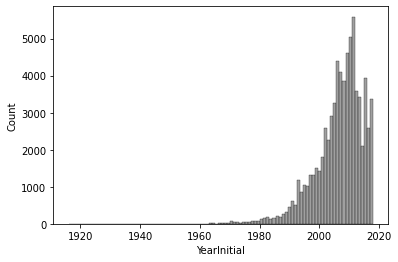

In [71]:
# hist(df$YearInitial, col='gray', xlab='Initial year', breaks = 100)
sns.histplot(data = data, x = 'YearInitial', bins = 100, color = 'gray')

In [72]:
tb = pd.DataFrame(data['YearInitial'].value_counts())
# tb <- table(df$YearInitial)
# tb = sorted(tb.index)

In [73]:
tb.sort_index(inplace = True)
tb.dropna(inplace = True)

In [74]:
# x = tb.index().tolist()
# list = list(tb['YearInitial']) 
x = tb.index.values.tolist() 

In [75]:
cumsum = tb['YearInitial'].cumsum()

# althernative method before sorting
# data1 = data.copy()
# data1.groupby(['YearInitial'])['geneId'].count().reset_index()
# groupby(['month'])['tests_per_case'].max().reset_index()

In [76]:
cumsum

1916.0        1
1924.0        2
1933.0        3
1948.0        5
1949.0        8
          ...  
2014.0    63233
2015.0    67164
2016.0    69763
2017.0    72686
2018.0    73123
Name: YearInitial, Length: 72, dtype: int64

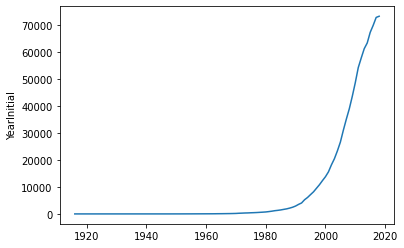

In [77]:
# plot(x,y, pch=19, type='l', xlab='Year', ylab='Total number of associations', lwd=5)
sns.lineplot(data = cumsum)

[Text(0, 0.5, 'Total number of associations'), Text(0.5, 0, 'Year')]

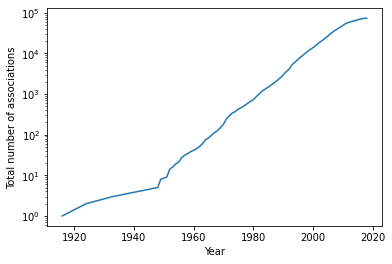

In [78]:
# plot(x,y, log='y', pch=19, type='l', xlab='Year', ylab='Total number of associations', lwd=5)

q = sns.lineplot(data = cumsum,x = cumsum.index, y = cumsum.values)
q.set(yscale="log")

q.set(xlabel='Year', ylabel='Total number of associations')
# q.set_yscale("log")

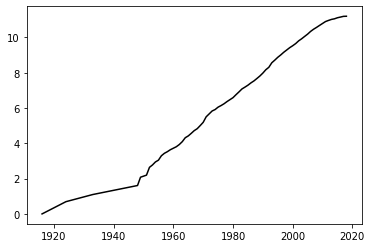

In [84]:
#another method 
q = sns.lineplot(data = cumsum,x = cumsum.index, y = np.log(cumsum.values), color = 'black')

[Text(0, 0.5, 'Cumulative Number (log2)'), Text(0.5, 0, 'Year')]

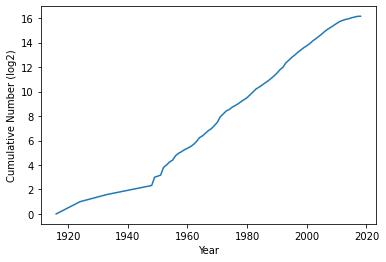

In [80]:
# logy <- log(y)/log(2)

# # we don't want to fit before 1945 
# inds <- which(x>1945) 
# # the lm function can be understood by looking at the manual through ?lm

import math
y = np.log(cumsum.values)
log_y = y/np.log(2)
k = sns.lineplot(data = cumsum,x = cumsum.index, y = log_y)
k.set(xlabel='Year', ylabel='Cumulative Number (log2)')

In [81]:
df = pd.DataFrame({'year':cumsum.index, 'cumsum':cumsum.values})


In [131]:
inds = df[df.year>1945]
inds.reset_index(inplace = True)

In [132]:
inds = inds.drop('index', axis=1)

In [133]:
inds['logy'] = 0

In [134]:
log_y_inds = np.log(inds['cumsum'])
x = inds['year'].tolist()

In [135]:

# import statsmodels.formula.api as smf
import statsmodels.api as sm

linmodel = sm.OLS(endog = log_y_inds, exog = x).fit()
# abline(fit, lty=2, col='red', lwd=3)

In [136]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 cumsum   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              458.3
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    6.28e-32
Time:                        18:20:22   Log-Likelihood:                         -167.70
No. Observations:                  69   AIC:                                      337.4
Df Residuals:                      68   BIC:                                      339.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0036      0.000     21.407      0.000       0.003       0.004
==============================================================================
Omnibus:                       18.843   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.355
Skew:                          -0.155   Prob(JB):                        0.113
Kurtosis:                       1.809   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# k = sns.lineplot(data = cumsum,x = cumsum.index, y = log_y)
# k.set(xlabel='Year', ylabel='Cumulative Number (log2)')
# k.lineplot(x=x,y=y, linestyle='--')
# plt.show()

[Text(0, 0.5, 'Cumulative Number of Appearances'), Text(0.5, 0, 'Year')]

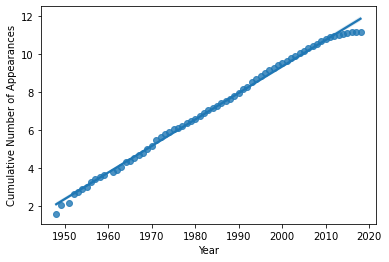

In [138]:
k = sns.regplot(x = x, y = log_y_inds)
k.set(xlabel='Year', ylabel='Cumulative Number of Appearances')

In [139]:
# fit <- lm(logy[inds]~x[inds])
# inds['logy'] = inds[[np.log(inds['cumsum'])]]
# import statsmodels.formula.api as smf 
# reg1 = smf.ols('logy ~  cumsum', data=inds).fit()

In [140]:
a = linmodel.rsquared
doubling_rate = 1/a

In [141]:
doubling_rate

1.1483896062427237

In [142]:
print('The total number of known associations doubles every {} years!'.format(int(doubling_rate)))

The total number of known associations doubles every 1 years!


In [143]:
from sklearn.linear_model import LinearRegression
#we get an error suggesting we should reshape data
model = LinearRegression().fit(np.array(x).reshape(-1,1), log_y_inds)

In [144]:
a = model.score(np.array(x).reshape(-1,1), log_y_inds)

In [145]:
doubling_rate = 1/a

In [146]:
print('The total number of known associations doubles every {} years!'.format(int(doubling_rate)))

The total number of known associations doubles every 1 years!


In [ ]:
#I have tried 2 models for linear regression but I can't figure out why i'm getting 1 year yet